In [241]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.fftpack as fft
import scipy.ndimage as img
import scipy.signal as sig
import numpy.random as rd
from PIL import Image, ImageDraw, ImageFont
import cv2 as cv
from jupyterthemes import jtplot

In [96]:
jtplot.reset()
mp.rcParams["figure.figsize"] = (5, 5)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
rd.seed(314)

In [142]:
def uint8(X):
    return np.round(abs(X)/abs(X).max() * (2**8 - 1)).astype("uint8")

## Activity 1. Anamorphic property of FT of different 2D patterns

D:\ProgramData\Anaconda3\envs\compsense\lib\site-packages\scipy\fftpack\basic.py:159: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


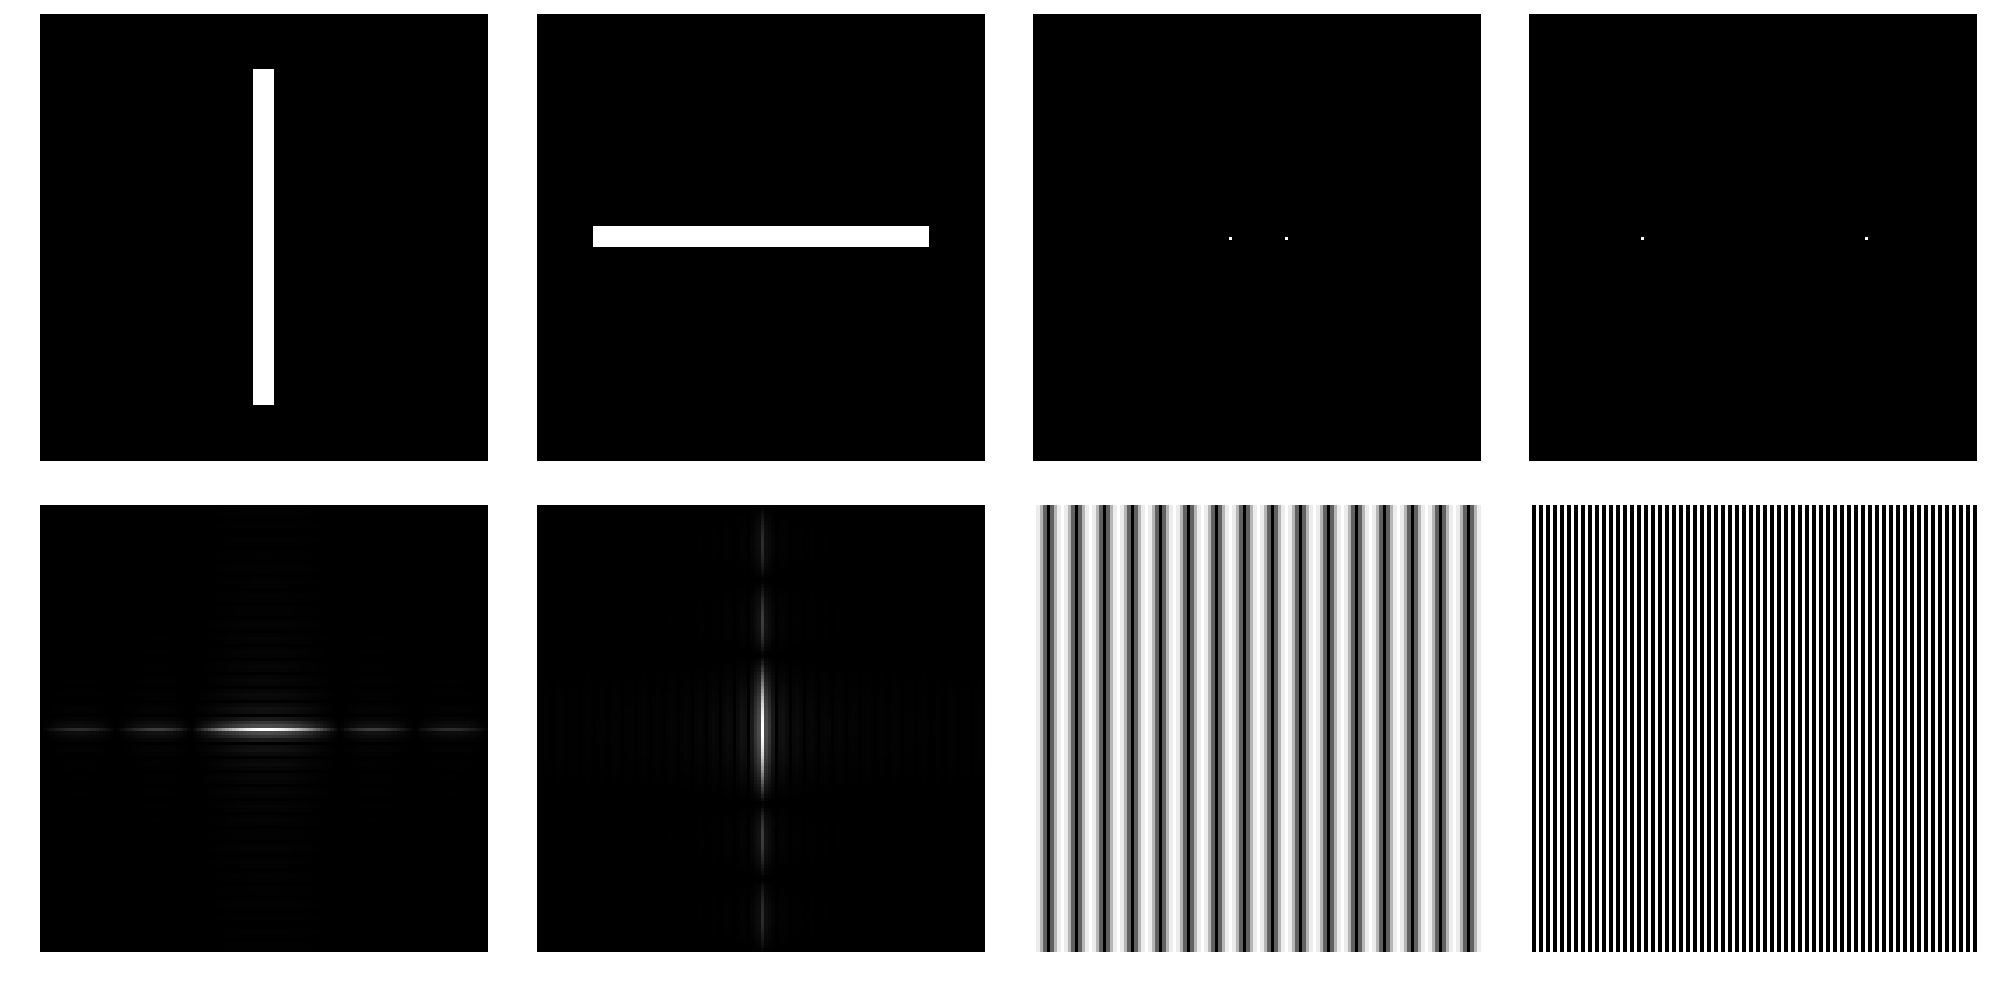

In [3]:
N = 128
fig = mp.figure(figsize=(5*4, 5*2))
r = 0

rtall = np.zeros((N, N), "uint8")
rtall[2*N//16:14*N//16 ,N//2-3:N//2+3] = 1
ax = fig.add_subplot(241)
ax.imshow(rtall, "gray")
ax.axis("off")

rwide = rtall.T
ax = fig.add_subplot(242)
ax.imshow(rwide, "gray")
ax.axis("off")

dots = Image.new("L", (N, N), color="black")
draw = ImageDraw.Draw(dots)
draw.ellipse((7*N//16-r, N//2-r, 7*N//16+r, N//2+r), fill="white")
draw.ellipse((9*N//16-r, N//2-r, 9*N//16+r, N//2+r), fill="white")
dots = np.array(dots, "uint8")
ax = fig.add_subplot(243)
ax.imshow(dots, "gray")
ax.axis("off")

dotspace = Image.new("L", (N, N), color="black")
draw = ImageDraw.Draw(dotspace)
draw.ellipse((N//4-r, N//2-r, N//4+r, N//2+r), fill="white")
draw.ellipse((3*N//4-r, N//2-r, 3*N//4+r, N//2+r), fill="white")
dotspace = np.array(dotspace, "uint8")
ax = fig.add_subplot(244)
ax.imshow(dotspace, "gray")
ax.axis("off")

Ftall = fft.fft2(rtall)
ax = fig.add_subplot(245)
ax.imshow(fft.fftshift(abs(Ftall)), "gray")
ax.axis("off")

Fwide = fft.fft2(rwide)
ax = fig.add_subplot(246)
ax.imshow(fft.fftshift(abs(Fwide)), "gray")
ax.axis("off")

Fdots = fft.fft2(dots)
ax = fig.add_subplot(247)
ax.imshow(fft.fftshift(abs(Fdots)), "gray")
ax.axis("off")

Fspace = fft.fft2(dotspace)
ax = fig.add_subplot(248)
ax.imshow(fft.fftshift(abs(Fspace)), "gray")
ax.axis("off")

mp.tight_layout()
mp.show()

## Activity 2. Rotation property of the FFT

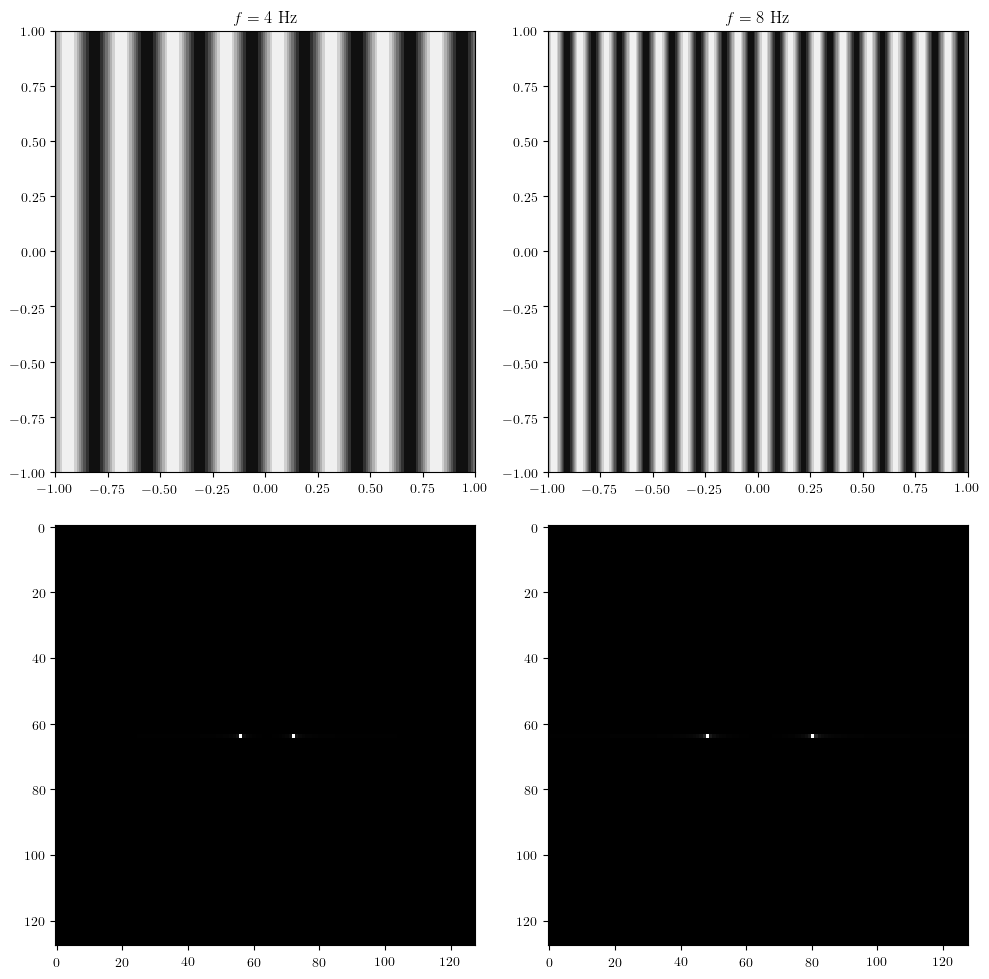

In [4]:
N = 128
t = np.linspace(-1, 1, N)
X,Y = np.meshgrid(t,t)

fig = mp.figure(figsize=(5*2, 5*2))

f = 4
w = 2*np.pi*f
Z4 = np.sin(w*X)
ax = fig.add_subplot(221)
ax.contourf(X, Y, Z4, cmap="gray")
ax.set_title(r"$f = %i$ Hz"%f)

f = 8
w = 2*np.pi*f
Z8 = np.sin(w*X)
ax = fig.add_subplot(222)
ax.contourf(X, Y, Z8, cmap="gray")
ax.set_title(r"$f = %i$ Hz"%f)

FZ4 = fft.fft2(Z4)
ax = fig.add_subplot(223)
ax.imshow(fft.fftshift(abs(FZ4)), cmap="gray")

FZ8 = fft.fft2(Z8)
ax = fig.add_subplot(224)
ax.imshow(fft.fftshift(abs(FZ8)), cmap="gray")

mp.tight_layout()
mp.show()

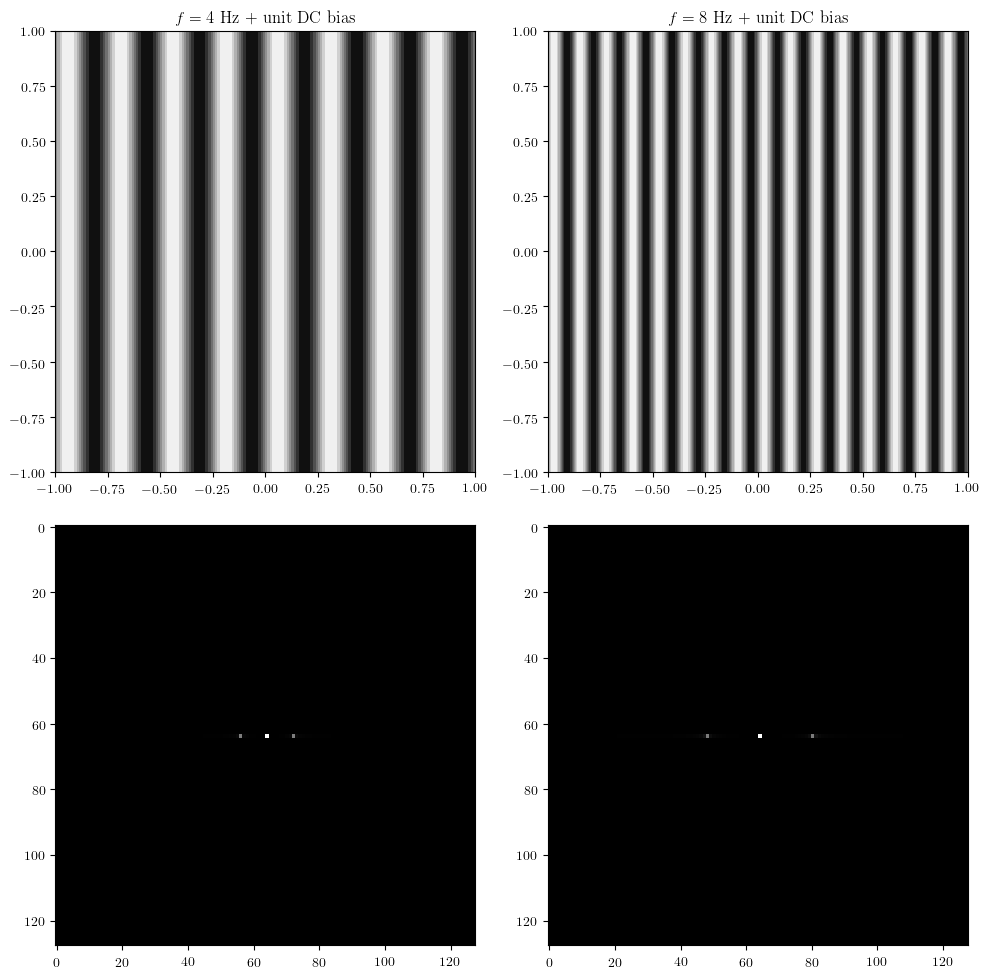

In [5]:
N = 128
t = np.linspace(-1, 1, N)
X,Y = np.meshgrid(t,t)

fig = mp.figure(figsize=(5*2, 5*2))

f = 4
w = 2*np.pi*f
Z4 = np.sin(w*X) + 1
ax = fig.add_subplot(221)
ax.contourf(X, Y, Z4, cmap="gray")
ax.set_title(r"$f = %i$ Hz + unit DC bias"%f)

f = 8
w = 2*np.pi*f
Z8 = np.sin(w*X) + 1
ax = fig.add_subplot(222)
ax.contourf(X, Y, Z8, cmap="gray")
ax.set_title(r"$f = %i$ Hz + unit DC bias"%f)

FZ4 = fft.fft2(Z4)
ax = fig.add_subplot(223)
ax.imshow(fft.fftshift(abs(FZ4)), cmap="gray")

FZ8 = fft.fft2(Z8)
ax = fig.add_subplot(224)
ax.imshow(fft.fftshift(abs(FZ8)), cmap="gray")

mp.tight_layout()
mp.show()

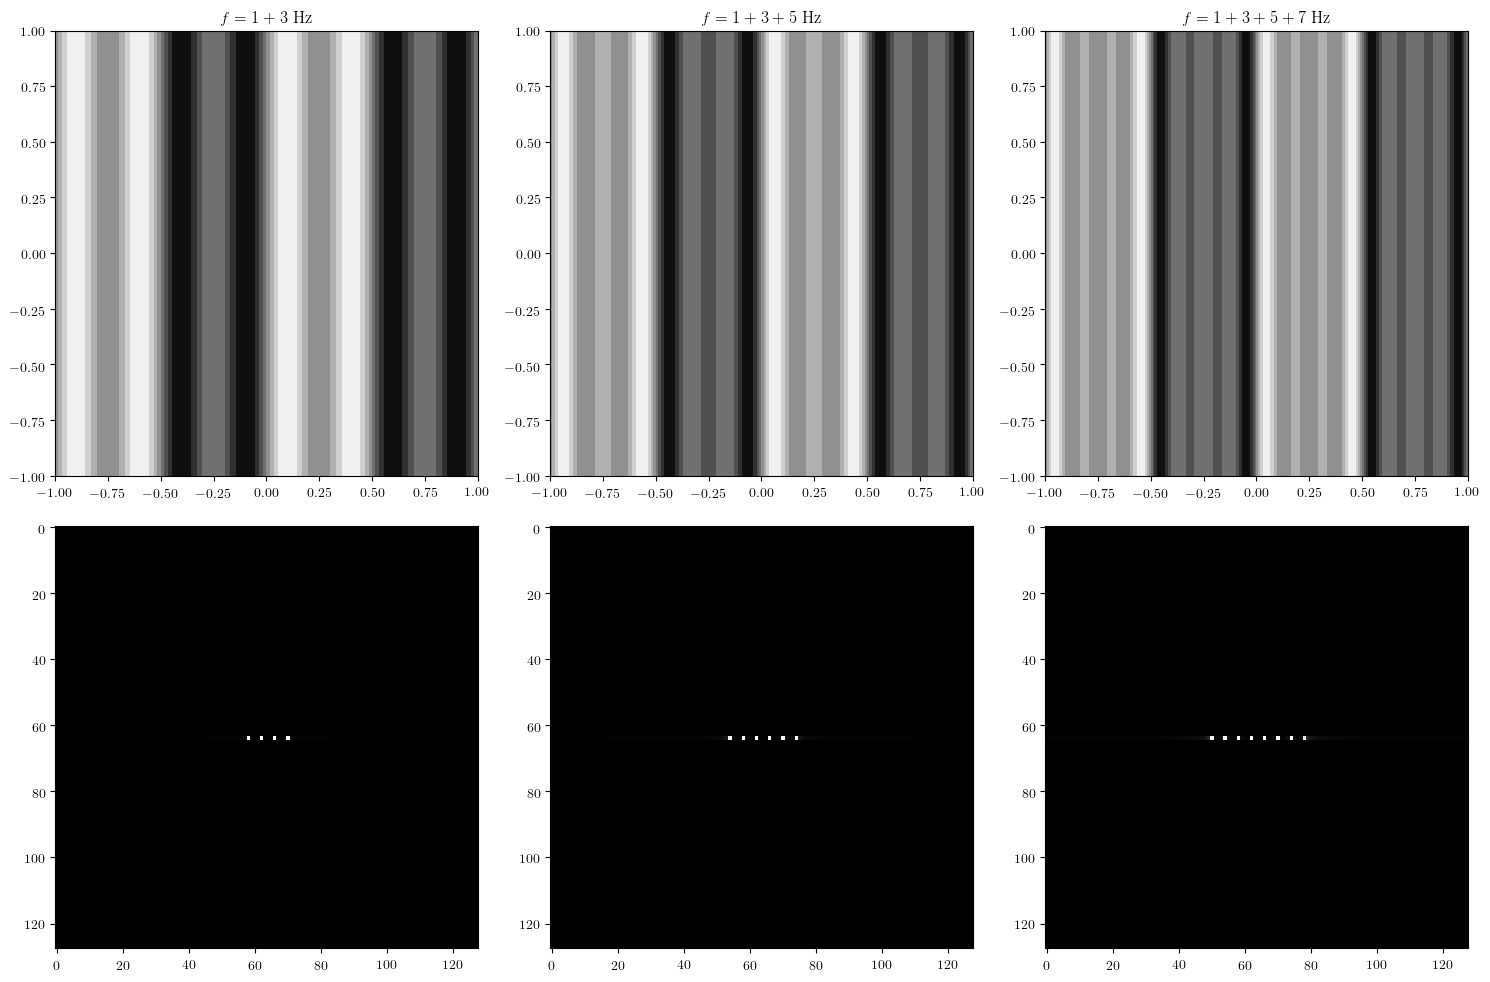

In [6]:
N = 128
t = np.linspace(-1, 1, N)
X,Y = np.meshgrid(t,t)

fig = mp.figure(figsize=(5*3, 5*2))

Z13 = np.sin(2*np.pi*1*X) + np.sin(2*np.pi*3*X)
ax = fig.add_subplot(231)
ax.contourf(X, Y, Z13, cmap="gray")
ax.set_title(r"$f = 1 + 3$ Hz")

Z135 = np.sin(2*np.pi*1*X) + np.sin(2*np.pi*3*X) + np.sin(2*np.pi*5*X)
ax = fig.add_subplot(232)
ax.contourf(X, Y, Z135, cmap="gray")
ax.set_title(r"$f = 1 + 3 + 5$ Hz")

Z1357 = np.sin(2*np.pi*1*X) + np.sin(2*np.pi*3*X) + np.sin(2*np.pi*5*X) + np.sin(2*np.pi*7*X)
ax = fig.add_subplot(233)
ax.contourf(X, Y, Z1357, cmap="gray")
ax.set_title(r"$f = 1 + 3 + 5 + 7$ Hz")

FZ13 = fft.fft2(Z13)
ax = fig.add_subplot(234)
ax.imshow(fft.fftshift(abs(FZ13)), cmap="gray")

FZ135 = fft.fft2(Z135)
ax = fig.add_subplot(235)
ax.imshow(fft.fftshift(abs(FZ135)), cmap="gray")

FZ1357 = fft.fft2(Z1357)
ax = fig.add_subplot(236)
ax.imshow(fft.fftshift(abs(FZ1357)), cmap="gray")

mp.tight_layout()
mp.show()

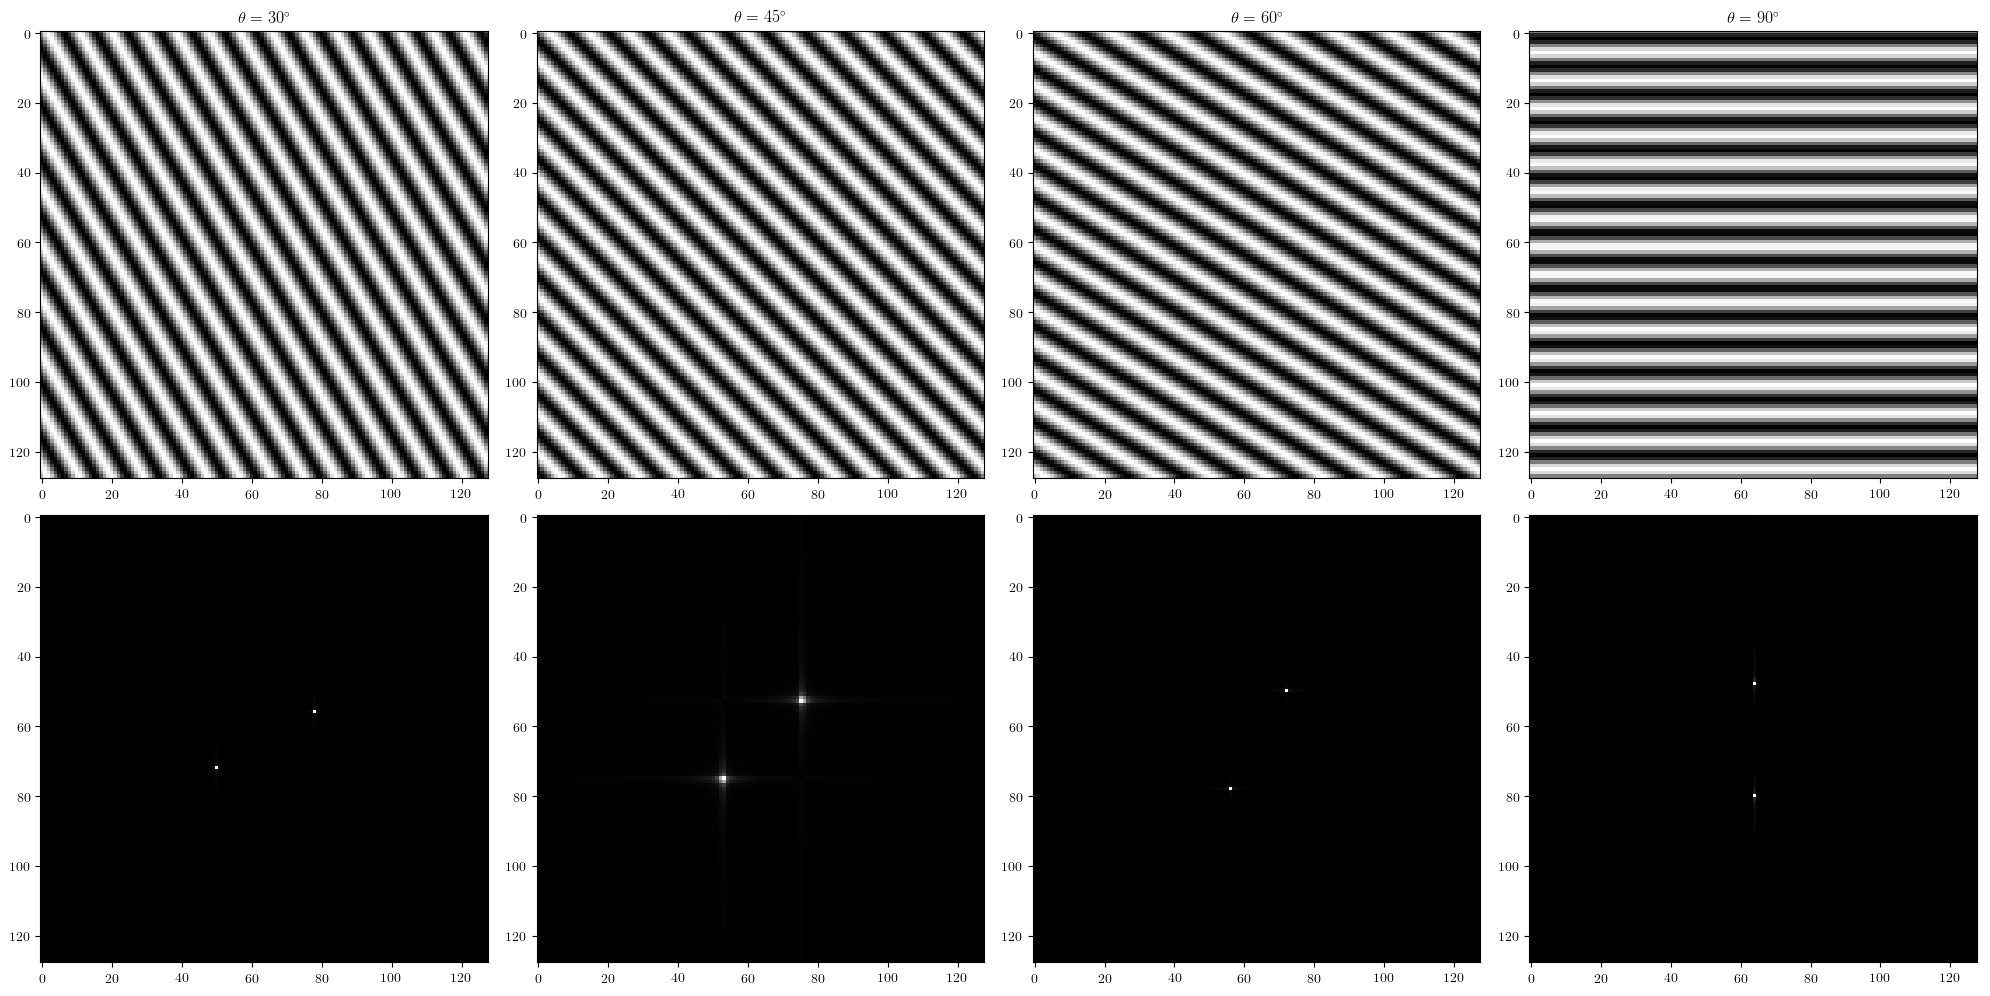

In [7]:
fig = mp.figure(figsize=(5*4, 5*2))
b = np.array([X, Y])
b = np.transpose(b, axes=(1,0,2))
thetalist = [30, 45, 60, 90]

for i in range(4):
    ax = fig.add_subplot(2, 4, i+1)
    theta = np.radians(thetalist[i])
    R = np.array([[np.cos(theta), -np.sin(theta)],
                 [np.sin(theta), np.cos(theta)]])
    Xp, Yp = R.dot(b)
    Z8prime = np.sin(2*np.pi*8*Xp)
    ax.imshow(Z8prime, "gray")
    ax.set_title(r"$\theta = %s^\circ$"%(thetalist[i]))
    
    ax = fig.add_subplot(2, 4, i+5)
    FZ = fft.fft2(Z8prime)
    ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

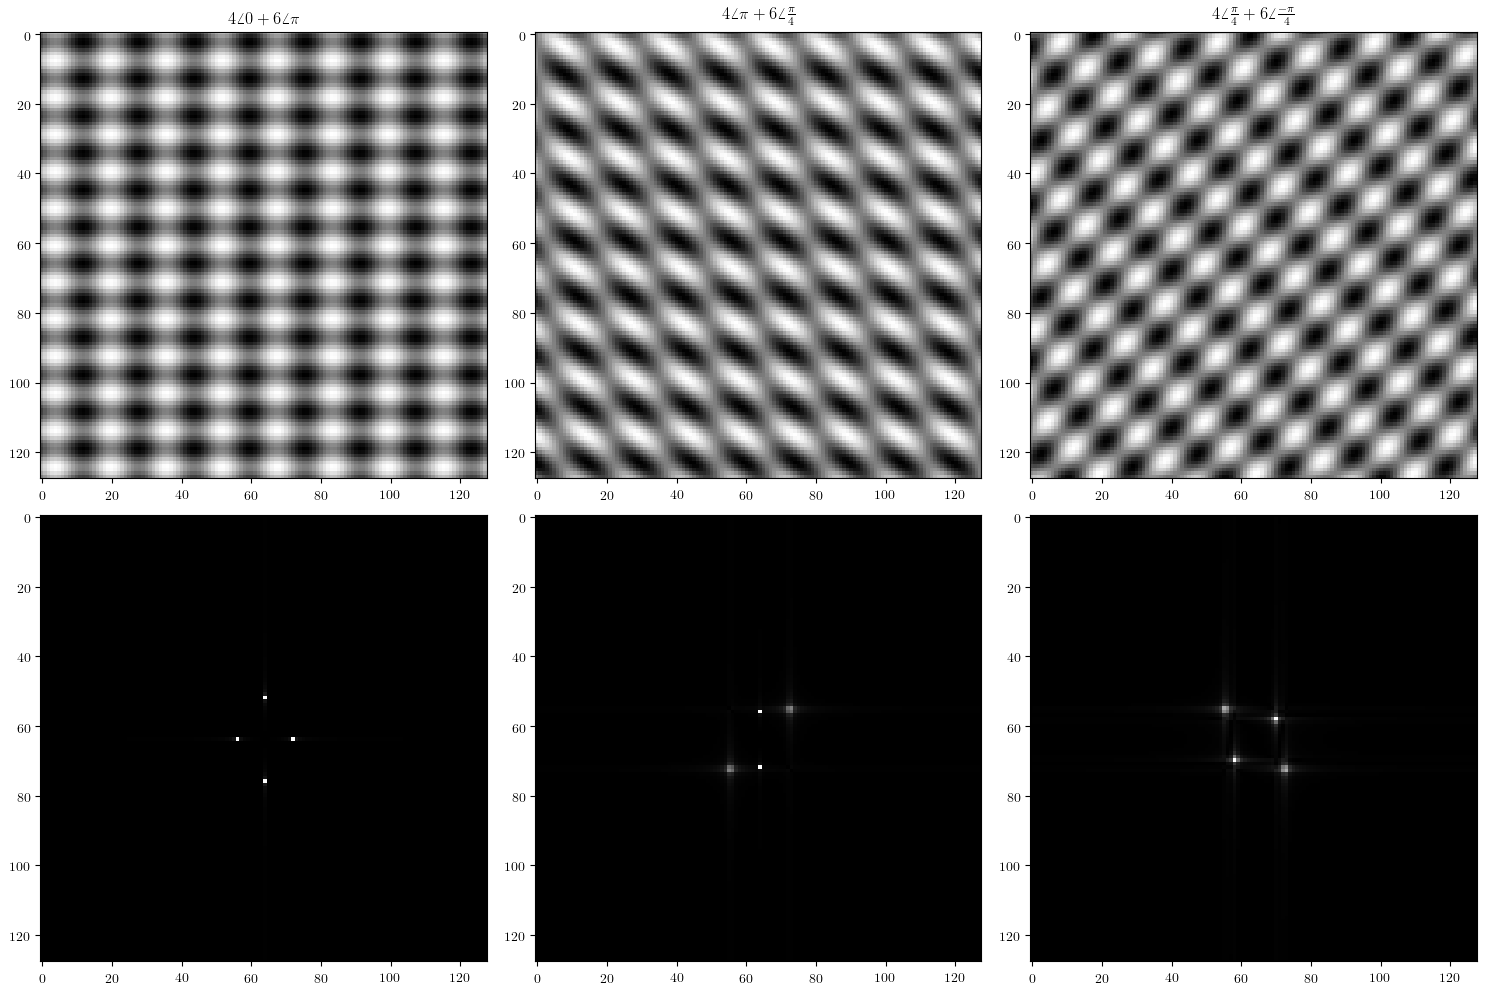

In [8]:
fig = mp.figure(figsize=(5*3, 5*2))

ax = fig.add_subplot(231)
theta = np.radians(90)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z = np.sin(2*np.pi*4*X) + np.sin(2*np.pi*6*Xp)
ax.imshow(Z, "gray")
ax.set_title(r"$4\angle 0 + 6\angle \pi$")

ax = fig.add_subplot(234)
FZ = fft.fft2(Z)
ax.imshow(fft.fftshift(abs(FZ)), "gray")

ax = fig.add_subplot(232)
theta = np.radians(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z = np.sin(2*np.pi*4*Y) + np.sin(2*np.pi*6*Xp)
ax.imshow(Z, "gray")
ax.set_title(r"$4\angle\pi + 6\angle\frac{\pi}{4}$")

ax = fig.add_subplot(235)
FZ = fft.fft2(Z)
ax.imshow(fft.fftshift(abs(FZ)), "gray")

ax = fig.add_subplot(233)
theta = np.radians(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z = np.sin(2*np.pi*4*Xp)
theta = np.radians(-45)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z += np.sin(2*np.pi*6*Xp)
ax.imshow(Z, "gray")
ax.set_title(r"$4\angle\frac{\pi}{4} + 6\angle\frac{-\pi}{4}$")

ax = fig.add_subplot(236)
FZ = fft.fft2(Z)
ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

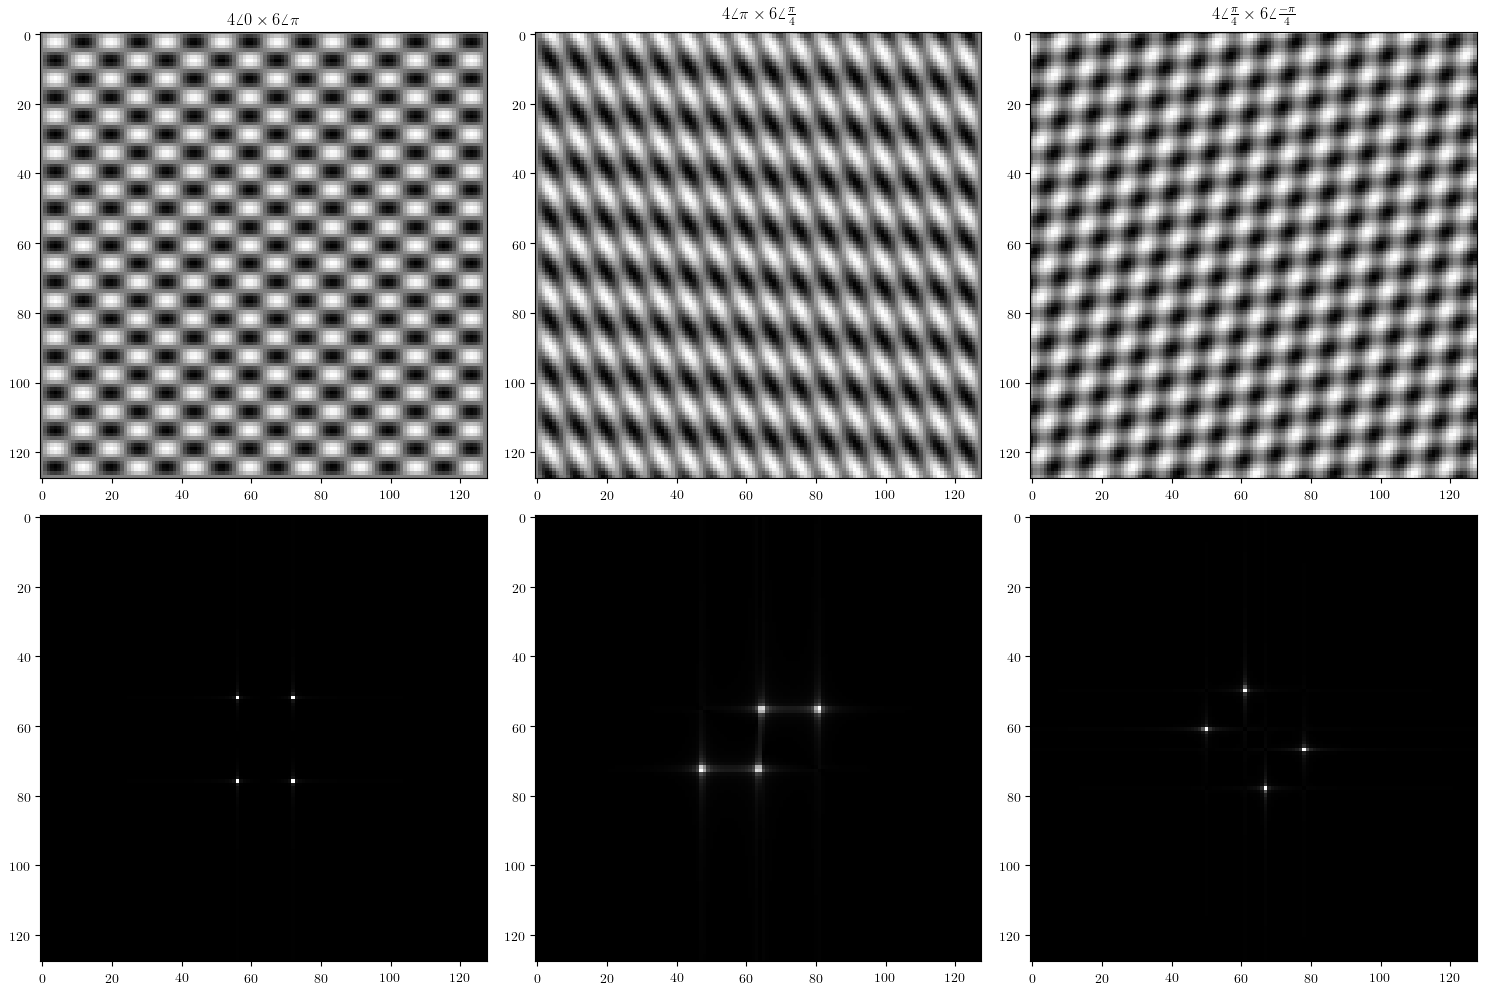

In [9]:
fig = mp.figure(figsize=(5*3, 5*2))

ax = fig.add_subplot(231)
Z = np.sin(2*np.pi*4*X) * np.sin(2*np.pi*6*Y)
ax.imshow(Z, "gray")
ax.set_title(r"$4\angle 0 \times 6\angle \pi$")

ax = fig.add_subplot(234)
FZ = fft.fft2(Z)
ax.imshow(fft.fftshift(abs(FZ)), "gray")

ax = fig.add_subplot(232)
theta = np.radians(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z = np.sin(2*np.pi*4*X) * np.sin(2*np.pi*6*Xp)
ax.imshow(Z, "gray")
ax.set_title(r"$4\angle\pi \times 6\angle\frac{\pi}{4}$")

ax = fig.add_subplot(235)
FZ = fft.fft2(Z)
ax.imshow(fft.fftshift(abs(FZ)), "gray")

ax = fig.add_subplot(233)
theta = np.radians(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z = np.sin(2*np.pi*4*Xp)
theta = np.radians(-45)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z *= np.sin(2*np.pi*6*Xp)
ax.imshow(Z, "gray")
ax.set_title(r"$4\angle\frac{\pi}{4} \times 6\angle\frac{-\pi}{4}$")

ax = fig.add_subplot(236)
FZ = fft.fft2(Z)
ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

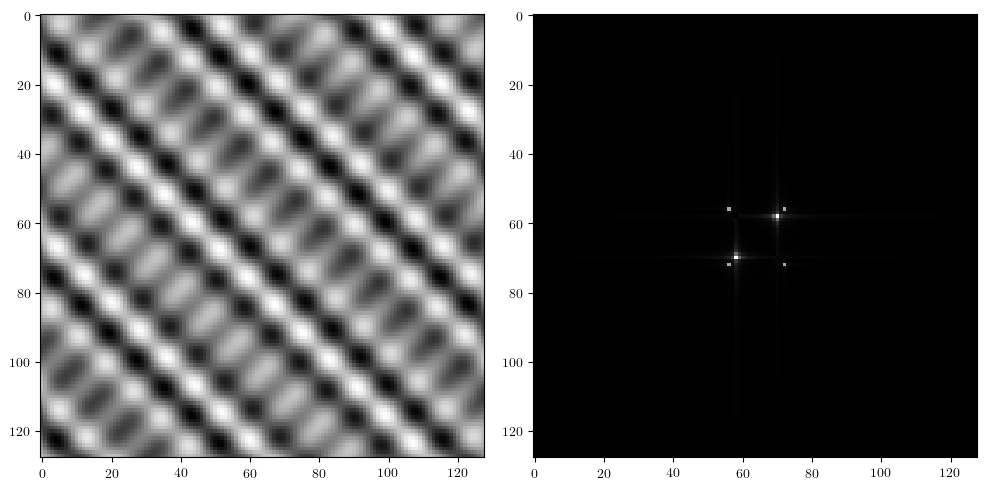

In [10]:
fig = mp.figure(figsize=(5*2, 5))

ax = fig.add_subplot(121)
Z = np.sin(2*np.pi*4*X) * np.sin((2*np.pi*4*Y))
theta = np.radians(45)
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
Xp, Yp = R.dot(b)
Z += np.sin(2*np.pi*4*Xp)
ax.imshow(Z, "gray")

ax = fig.add_subplot(122)
FZ = fft.fft2(Z)
ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

## Activity 3. Convolution Theorem Redux

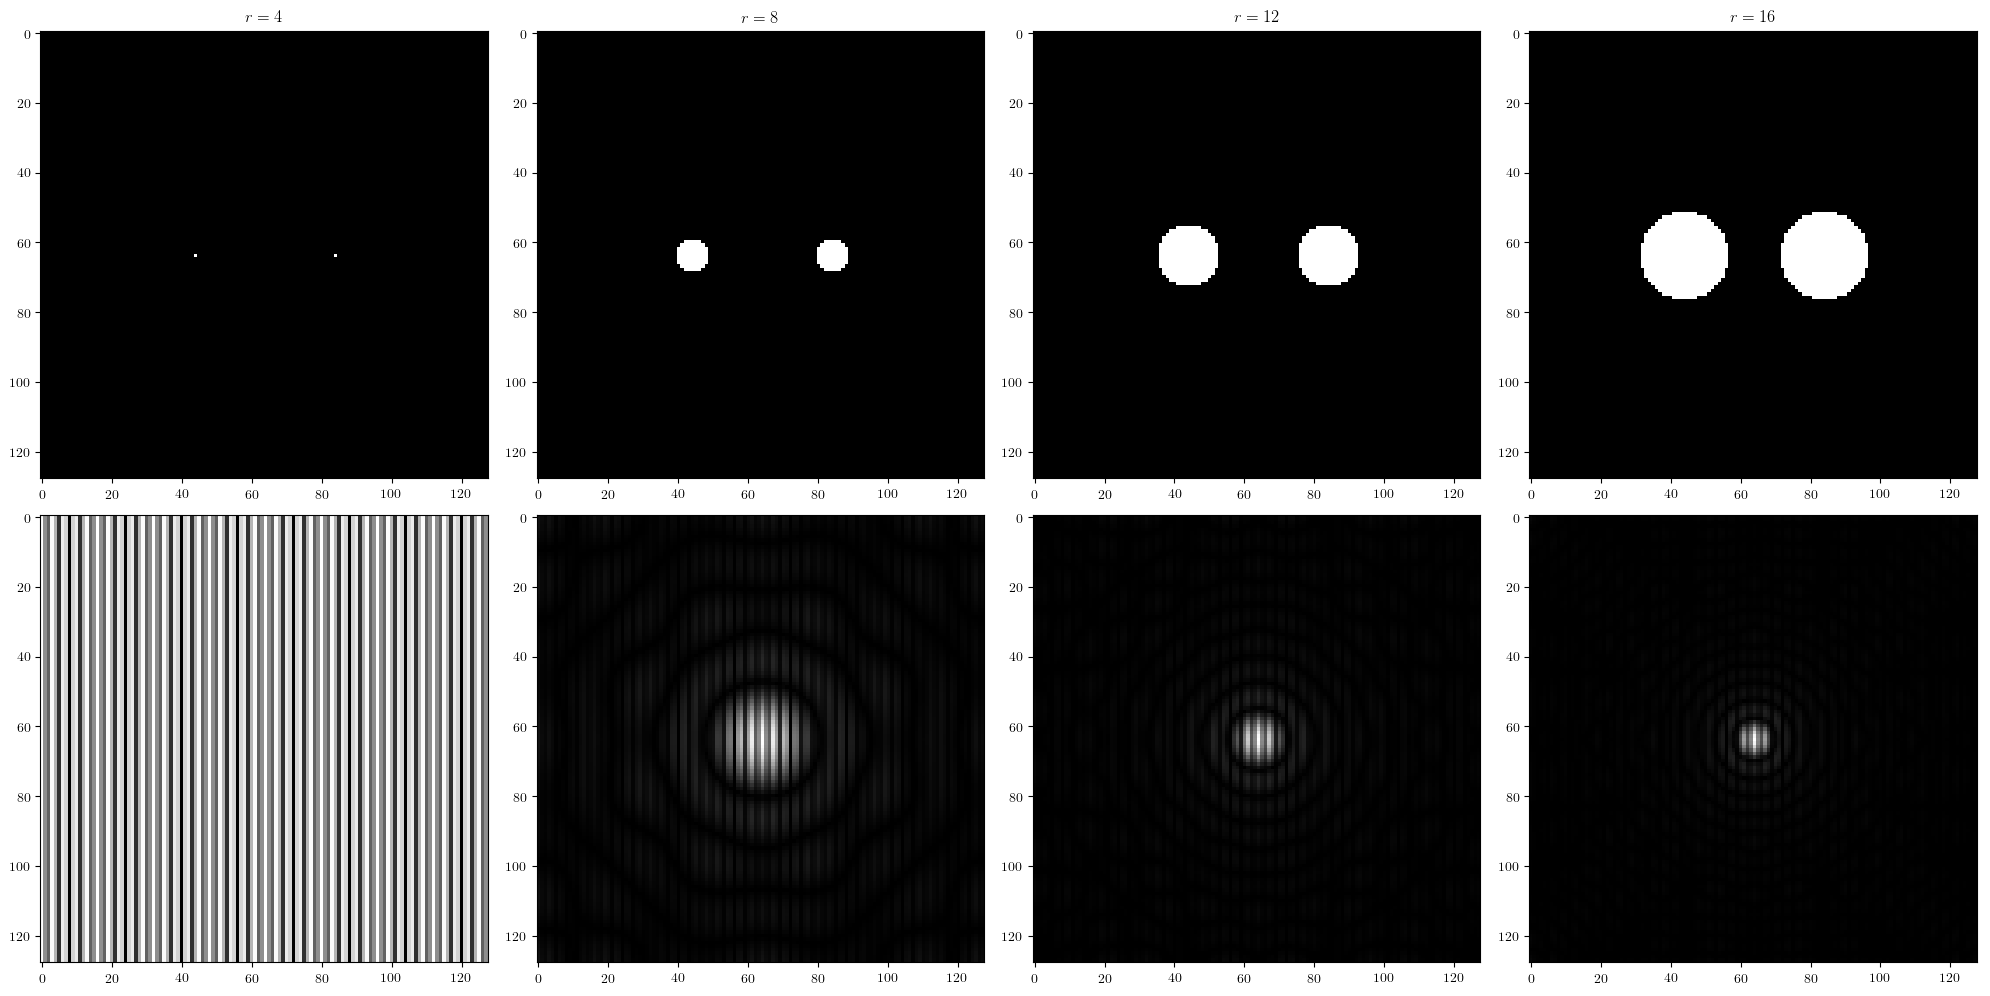

In [40]:
def fftcircle(Z, r, h, k, **kwargs):
    draw = ImageDraw.Draw(Z)
    draw.ellipse((h-r, k-r, h+r, k+r), **kwargs)

N = 128
r = 4
fig = mp.figure(figsize=(5*4, 5*2))

for i in range(4):
    Z = Image.new("L", (N, N), color="black")
    fftcircle(Z, r*i, N//2-20, N//2, fill="white")
    fftcircle(Z, r*i, N//2+20, N//2, fill="white")
    Z = np.array(Z, "uint8")

    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(Z, "gray")
    ax.set_title(r"$r = %i$"%(r*(i+1)))

    ax = fig.add_subplot(2, 4, i+5)
    FZ = fft.fft2(Z)
    ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

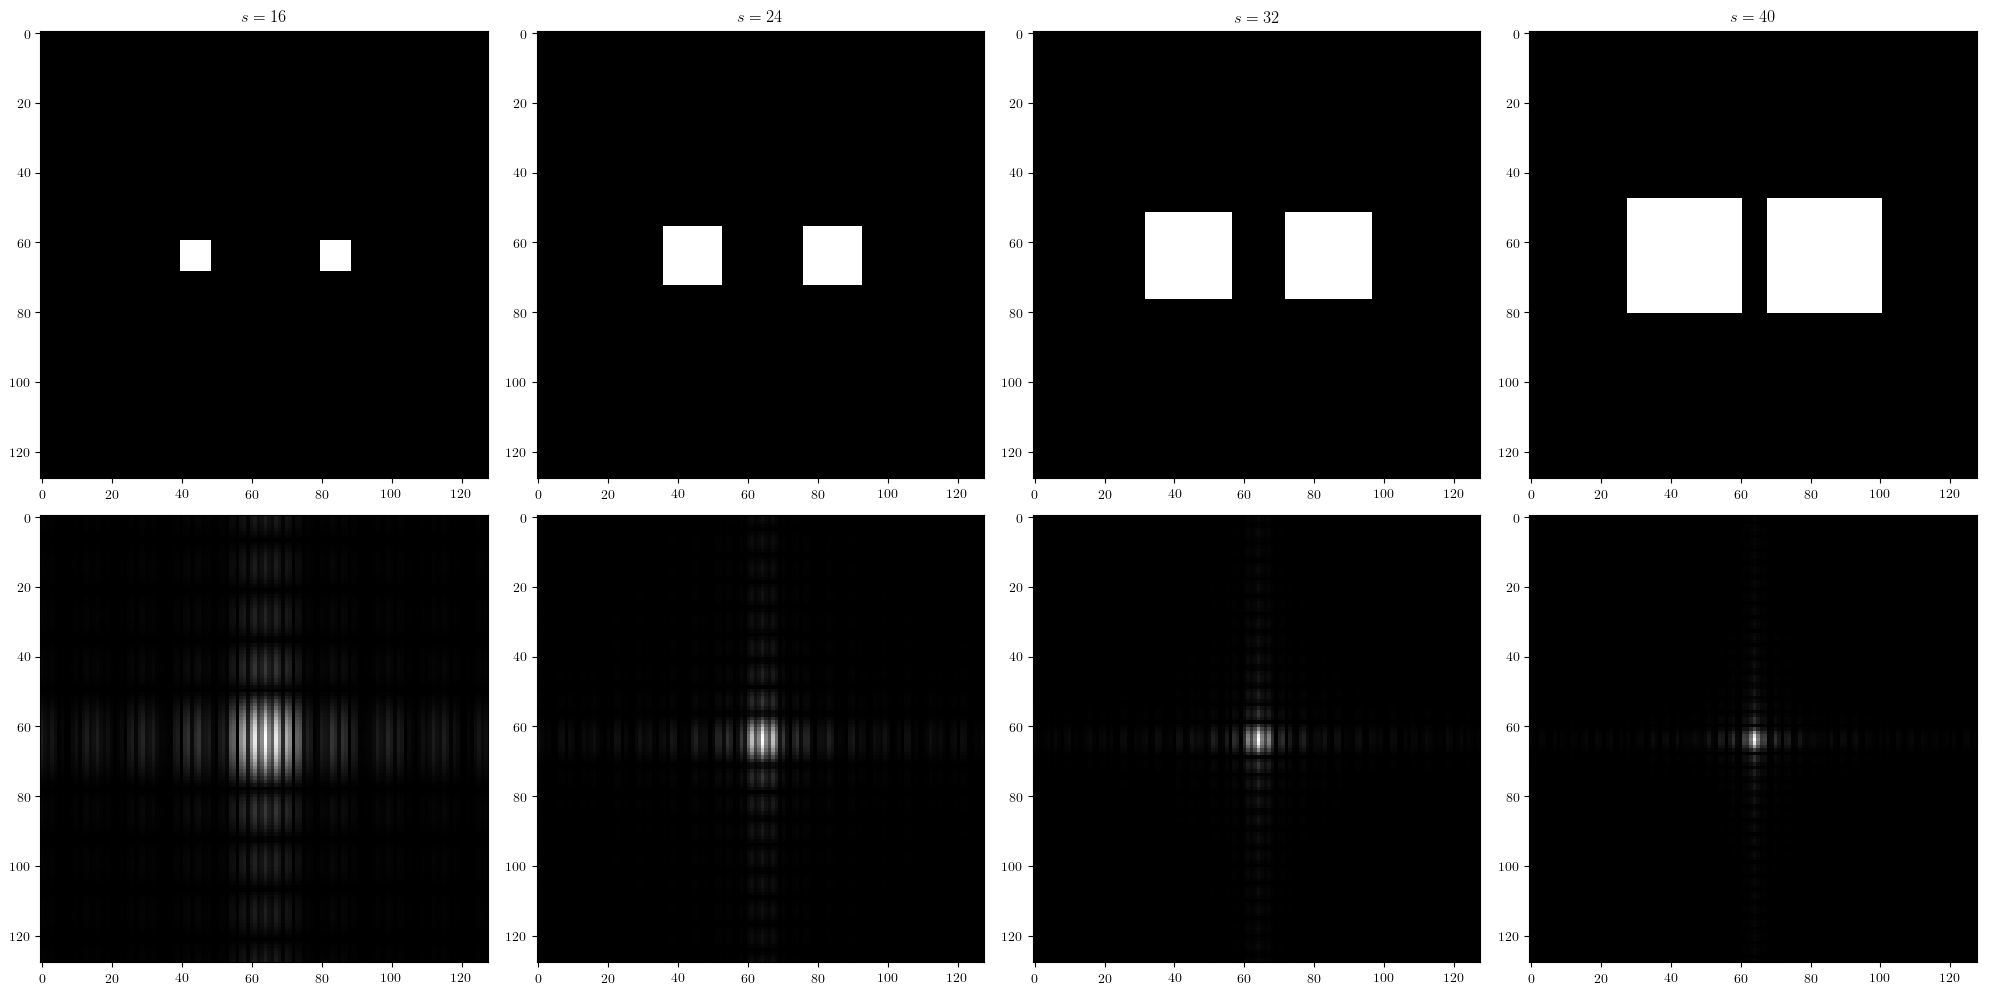

In [49]:
def fftsquare(Z, r, h, k, **kwargs):
    draw = ImageDraw.Draw(Z)
    draw.rectangle((h-r, k-r, h+r, k+r), **kwargs)

N = 128
r = 4
fig = mp.figure(figsize=(5*4, 5*2))

for i in range(1, 5):
    Z = Image.new("L", (N, N), color="black")
    fftsquare(Z, r*i, N//2-20, N//2, fill="white")
    fftsquare(Z, r*i, N//2+20, N//2, fill="white")
    Z = np.array(Z, "uint8")

    ax = fig.add_subplot(2, 4, i)
    ax.imshow(Z, "gray")
    ax.set_title(r"$s = %i$"%(2*r*(i+1)))

    ax = fig.add_subplot(2, 4, i+4)
    FZ = fft.fft2(Z)
    ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

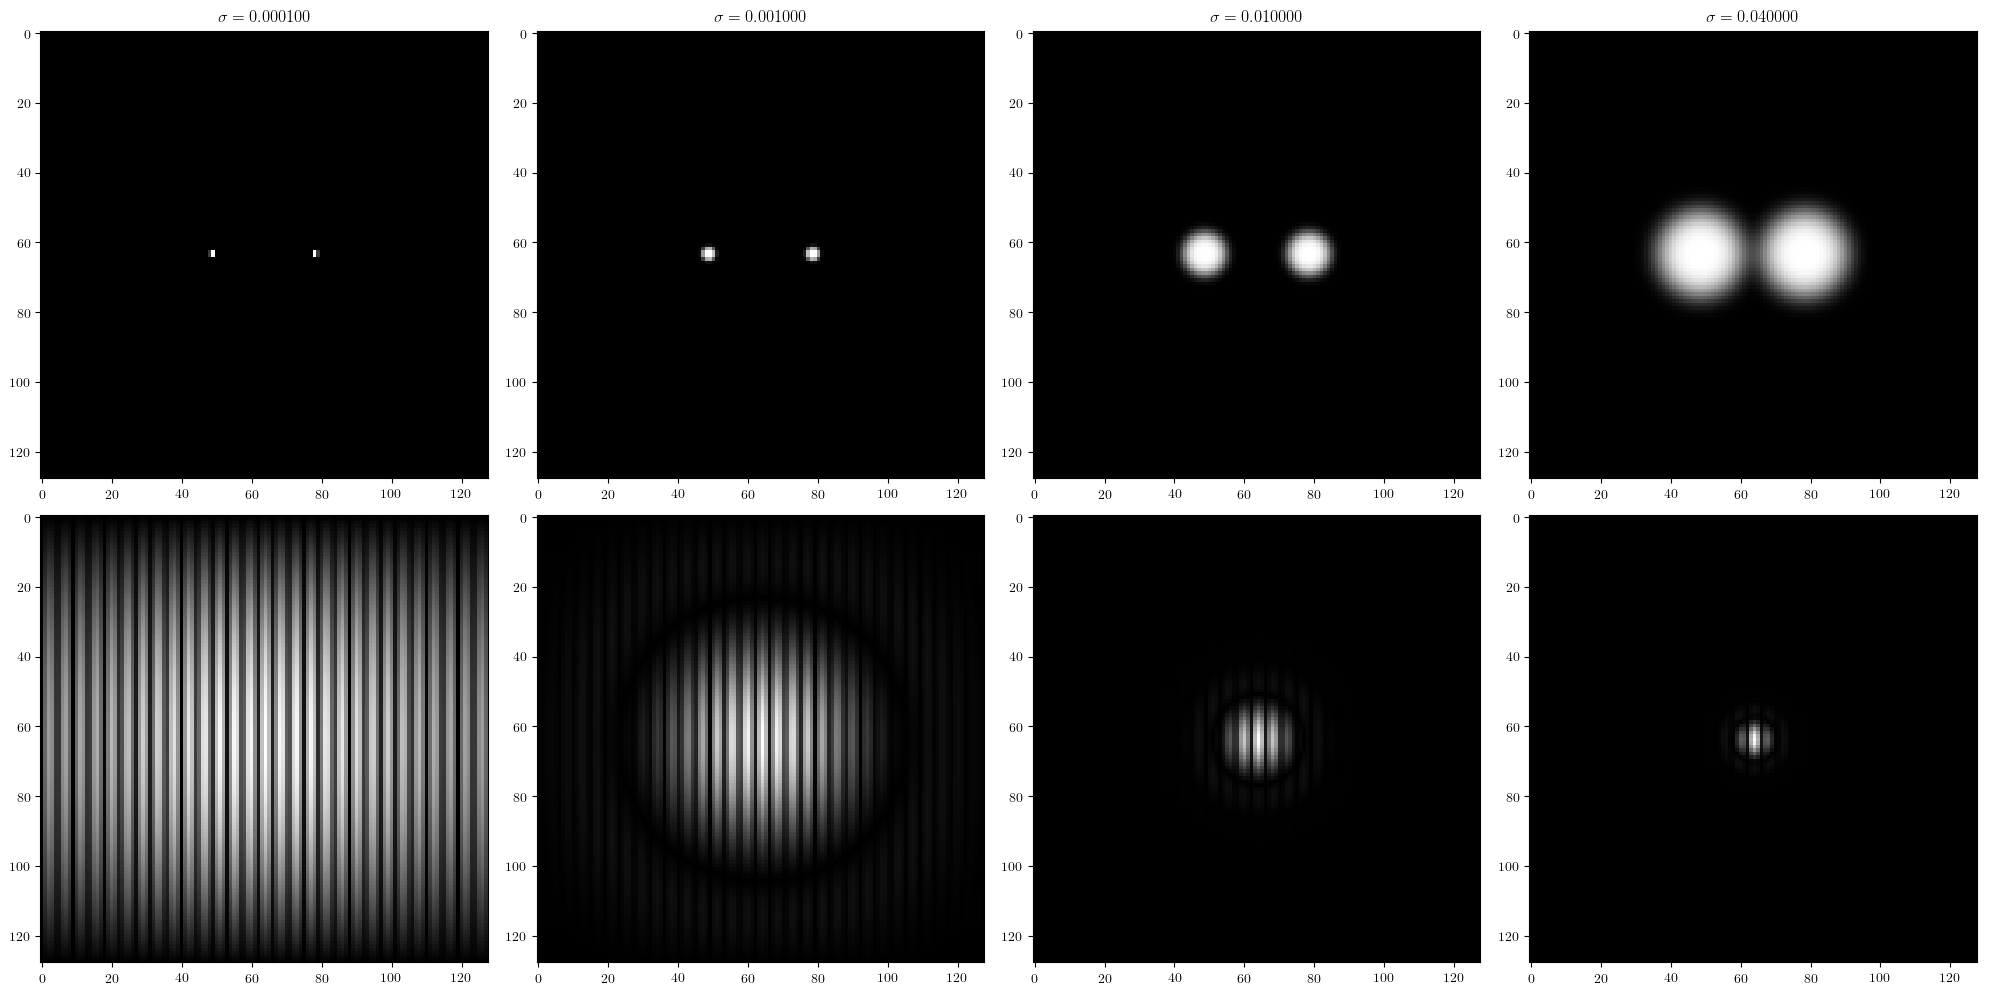

In [92]:
def fftgauss(X, Y, mux, muy, sigma):
    return np.exp(-((X - mux/len(X))**2 + (Y - muy/len(Y))**2)**2/sigma**2)

N = 128
r = 4
fig = mp.figure(figsize=(5*4, 5*2))
sd = [0.0001, 0.001, 0.01, 0.04]

for i in range(4):
    Z = fftgauss(X, Y, 30, 0, sd[i])
    Z += fftgauss(X, Y, -30, 0, sd[i])

    ax = fig.add_subplot(2, 4, i+1)
    ax.imshow(Z, "gray")
    ax.set_title(r"$\sigma = {0:f}$".format(sd[i]))

    ax = fig.add_subplot(2, 4, i+5)
    FZ = fft.fft2(Z)
    ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

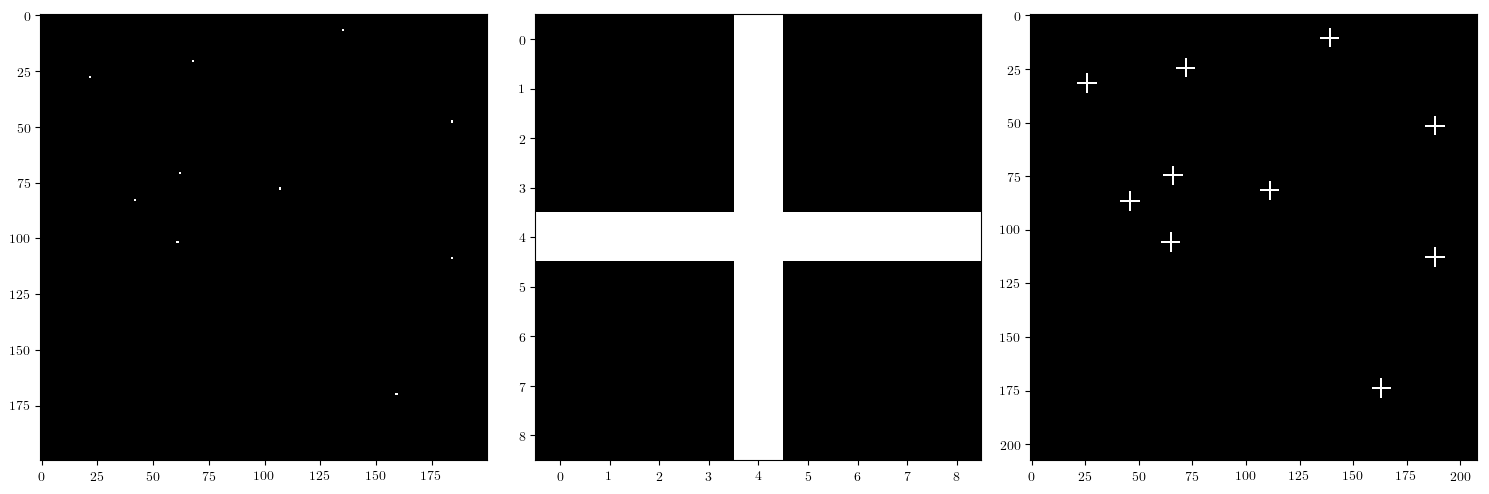

In [108]:
N = 200
A = np.zeros((N, N), "uint8")
d = np.zeros((9,9), "uint8")
d[9//2] = 1
d.T[9//2] = 1
for i in range(10):
    x,y = rd.randint(0, N, 2)
    A[x,y] = 1
    
fig = mp.figure(figsize=(5*3, 5))

ax = fig.add_subplot(131)
ax.imshow(A, "gray")

ax = fig.add_subplot(132)
ax.imshow(d, "gray")

ax = fig.add_subplot(133)
y = sig.convolve2d(A, d, "full")
ax.imshow(y, "gray")

mp.tight_layout()
mp.show()

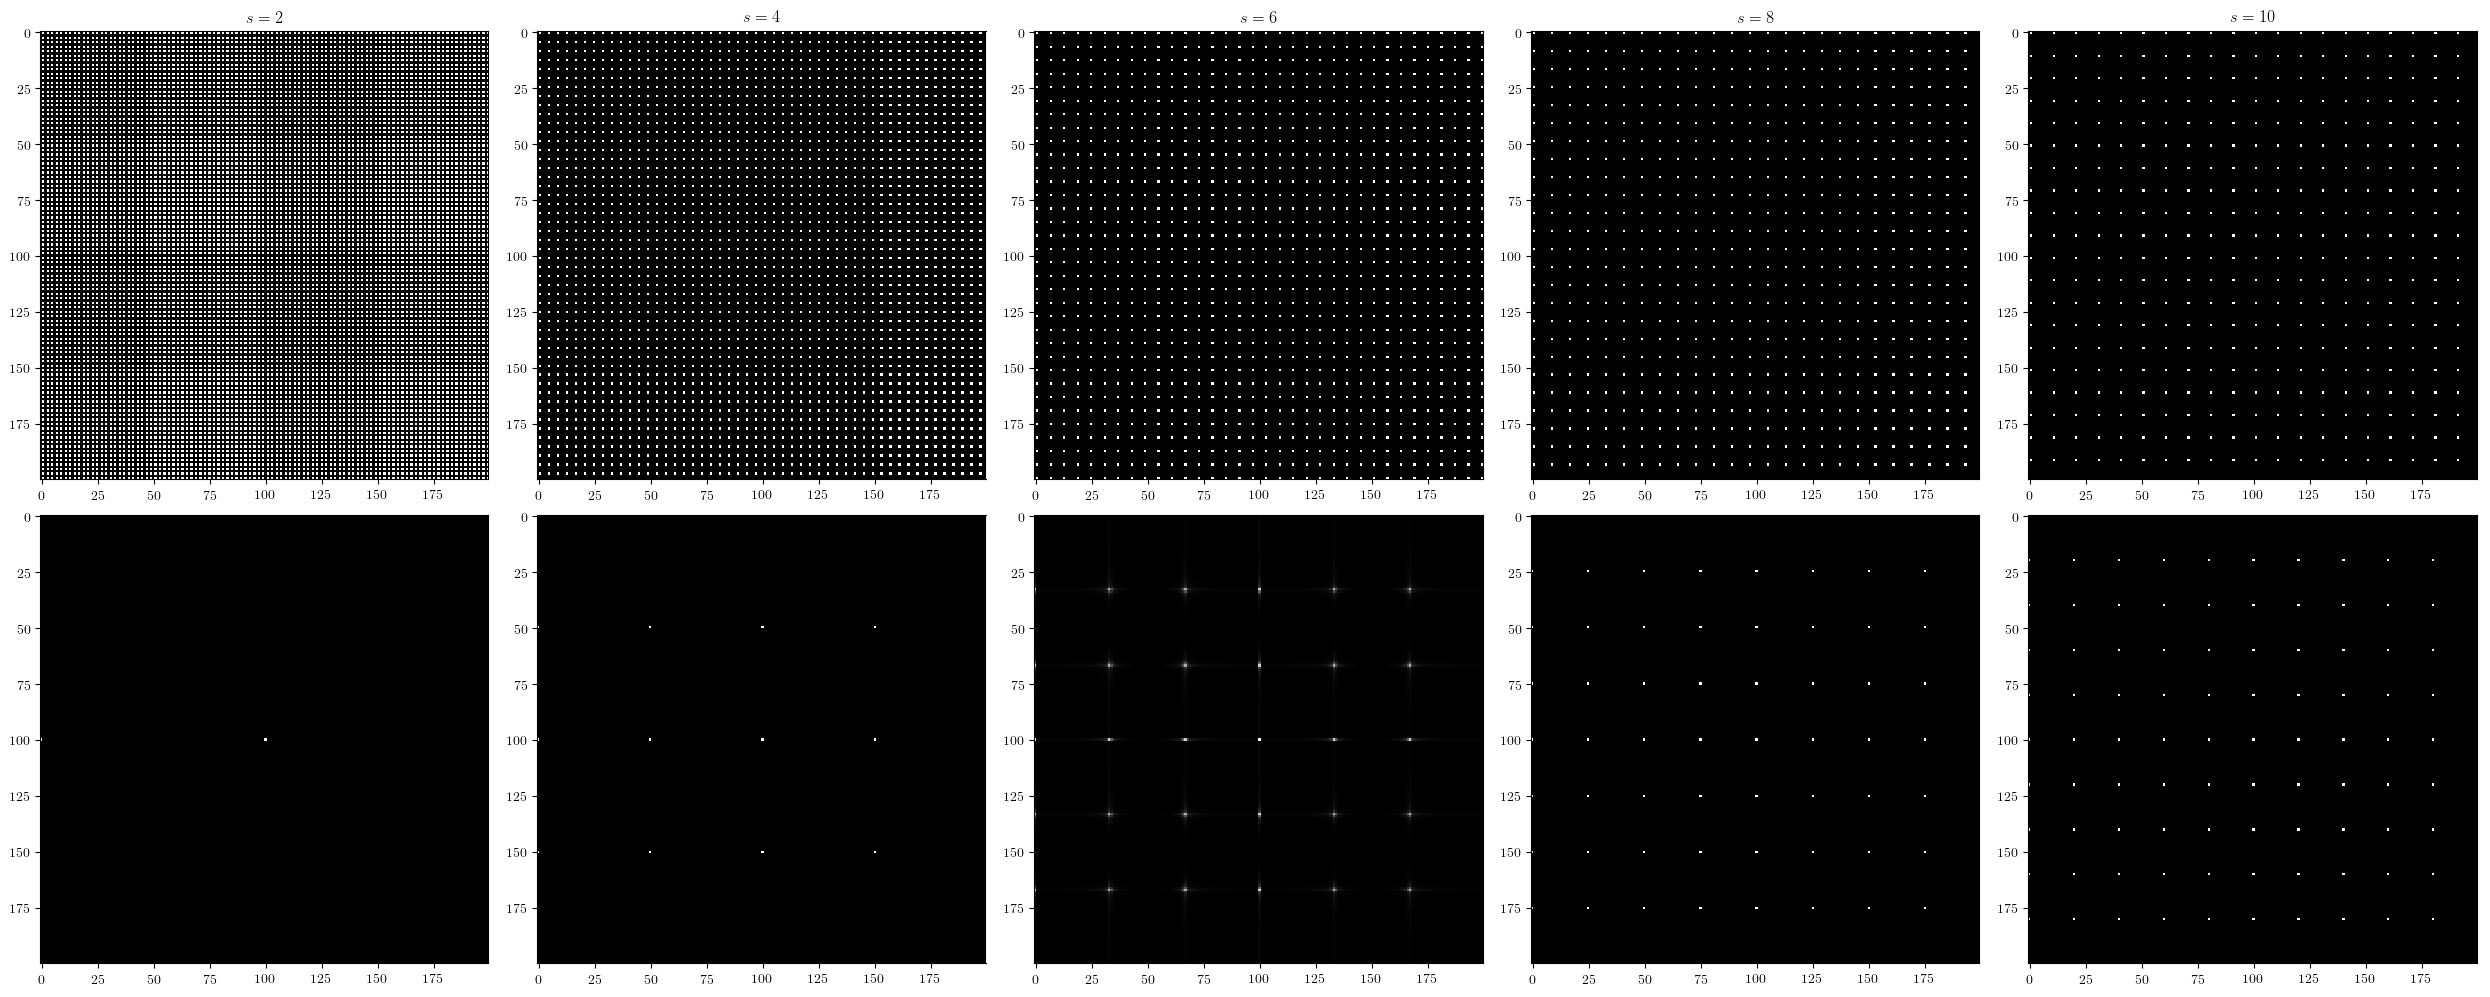

In [120]:
N = 200
fig = mp.figure(figsize=(5*5, 5*2))

for i in range(5):
    Z = np.zeros((N, N), "uint8")
    Z[1::(i+1)*2, 1::(i+1)*2] = 1
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(Z, "gray")
    ax.set_title(r"$s = %i$"%((i+1)*2))
    
    FZ = fft.fft2(Z)
    ax = fig.add_subplot(2, 5, i+6)
    ax.imshow(fft.fftshift(abs(FZ)), "gray")

mp.tight_layout()
mp.show()

## Activity 4. Fingerprints: Ridge Enhancement

Fingerprint obtained from fingerprints4all.com

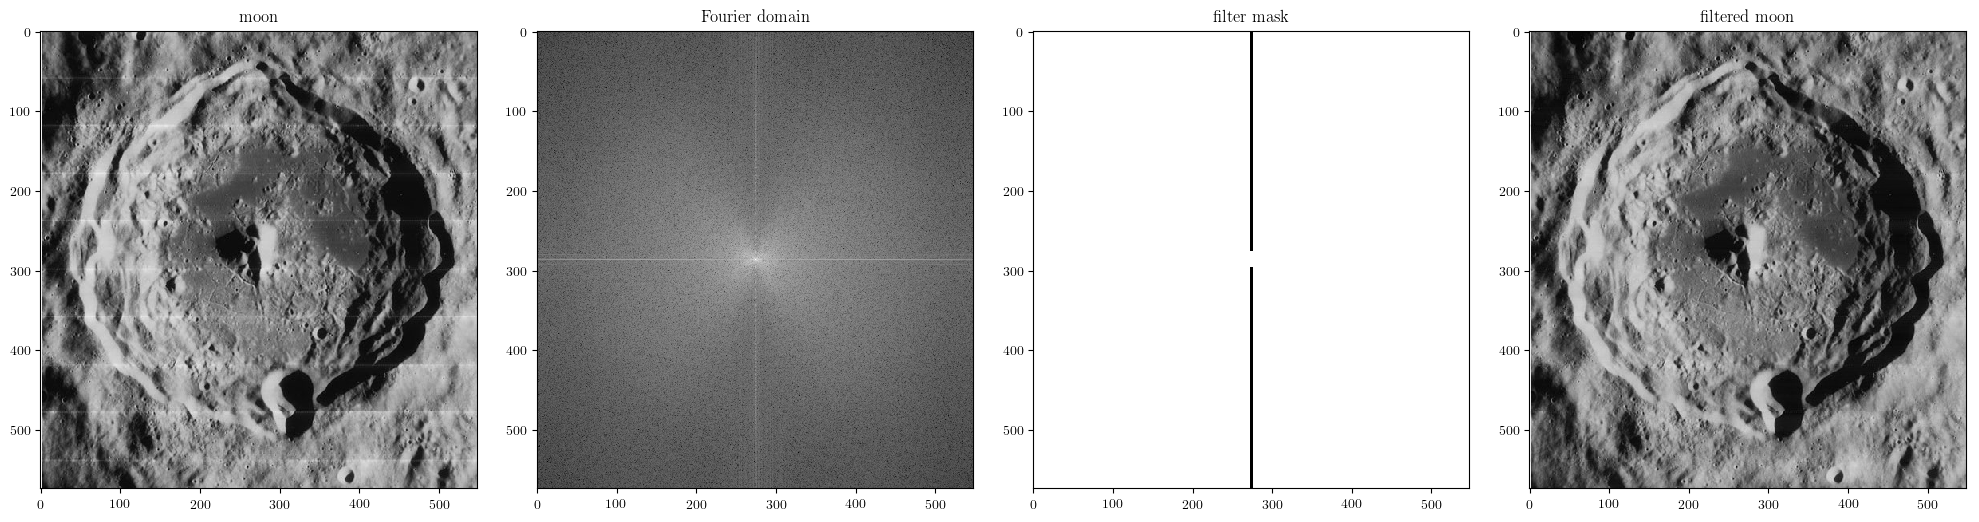

In [223]:
moon = img.imread("lunarlines.jpg", mode="L")
fig = mp.figure(figsize=(5*4, 5))

ax = fig.add_subplot(141)
ax.imshow(moon, "gray")
ax.set_title("moon")

ax = fig.add_subplot(142)
FA = fft.fft2(moon)
ax.imshow(np.log(fft.fftshift(abs(FA))), "gray")
ax.set_title("Fourier domain")

ax = fig.add_subplot(143)
mask = np.ones_like(moon, "uint8")
H, L = moon.shape
mask.T[L//2-2 : L//2+2] = 0
mask[H//2-10 : H//2+10, L//2-10 : L//2+10] = 1
ax.imshow(mask, "gray")
ax.set_title("filter mask")

ax = fig.add_subplot(144)
filt = fft.fftshift(FA) * mask
Imoon = fft.ifft2(filt)
ax.imshow(abs(Imoon), "gray")
ax.set_title("filtered moon")

mp.tight_layout()
mp.show()

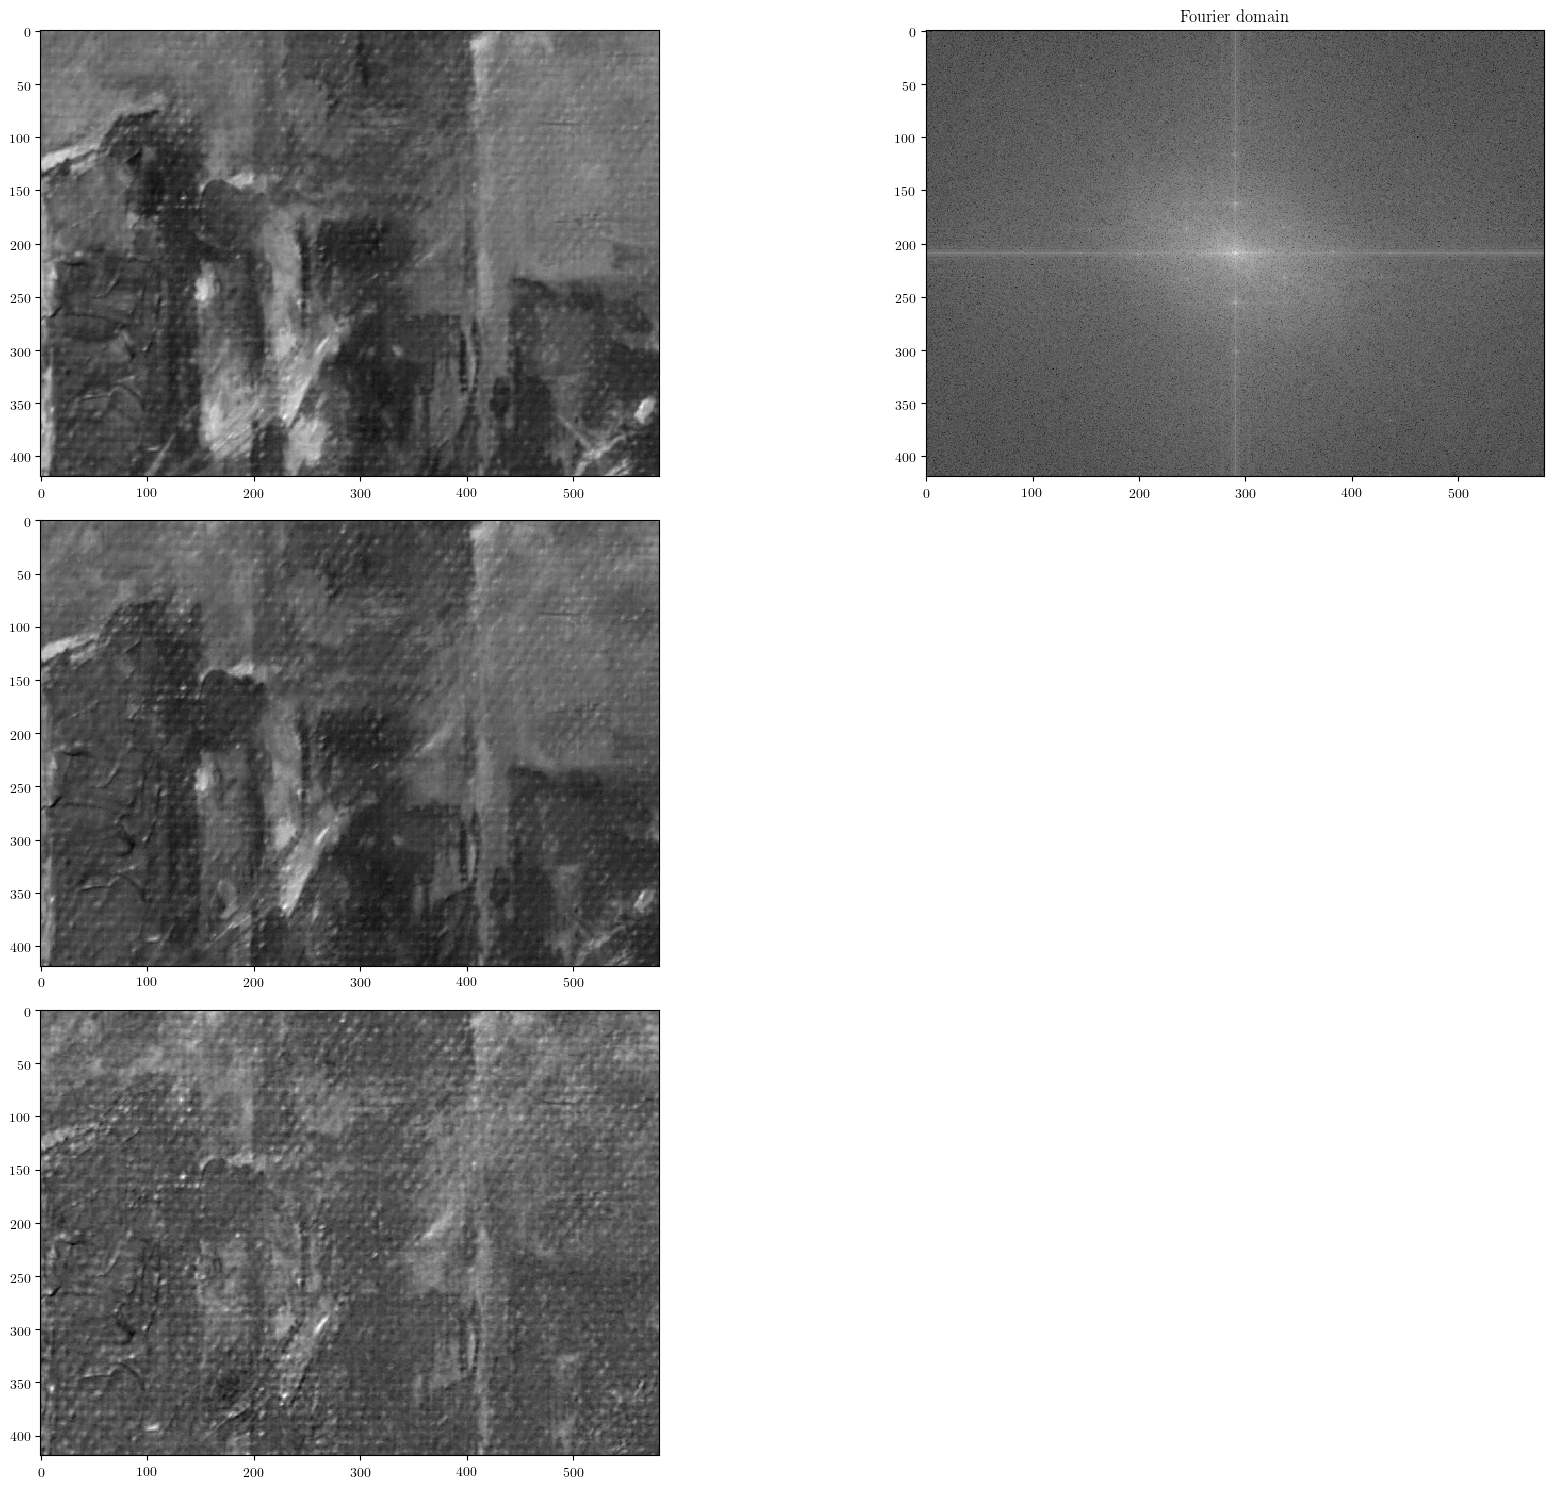

In [266]:
canvas = img.imread("canvasweave.JPG", mode="RGB")
fig = mp.figure(figsize=(5*16/9*4, 5*3))

for i in range(3):
    ax = fig.add_subplot(3, 4, i*4 + 1)
    ax.imshow(canvas[:,:,i], "gray")

ax = fig.add_subplot(342)
FA = fft.fft2(canvas[:,:,0])
ax.imshow(np.log(fft.fftshift(abs(FA))), "gray")
ax.set_title("Fourier domain")

mp.tight_layout()
mp.show()